<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/15_Hyperparameter_Tuning_in_Python/01_Hyperparameters_and_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Hyperparameters and Parameters


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/credit-card-full.csv"
# Read the CSV file

# Apply pd.to_numeric only to relevant columns, excluding 'text'
speech_df = pd.read_csv(url)


display(speech_df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Introduction & 'Parameters'

**Extracting a Logistic Regression parameter**  
You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the scikit-learn.org documentation for the LogisticRegression() module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the coef_ attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

You will have available:

- A logistic regression model object named log_reg_clf
- The X_train DataFrame

sklearn and pandas have been imported for you.



In [2]:
# Define features (X) and target (y)
X = speech_df.drop('default payment next month', axis=1)
y = speech_df['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a logistic regression model
log_reg_clf = LogisticRegression()

# Fit the model to the training data
log_reg_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
print(top_three_df)

# You have succesfully extracted and reviewed a very important parameter for the Logistic Regression Model.
# The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome.
# Additionally the sign lets you know if it is a positive or negative relationship.

     Variable   Coefficient
0          ID -2.582208e-05
1   LIMIT_BAL -4.055343e-06
2         SEX -6.350088e-07
3   EDUCATION -7.050592e-07
4    MARRIAGE -6.835795e-07
5         AGE -8.756342e-06
6       PAY_0  1.745821e-06
7       PAY_2  1.396800e-06
8       PAY_3  1.219370e-06
9       PAY_4  1.132057e-06
10      PAY_5  1.011634e-06
11      PAY_6  9.369615e-07
12  BILL_AMT1 -9.106739e-06
13  BILL_AMT2  4.977641e-06
14  BILL_AMT3  2.445564e-06
15  BILL_AMT4  2.304352e-06
16  BILL_AMT5  1.672314e-06
17  BILL_AMT6  1.802177e-06
18   PAY_AMT1 -2.569173e-05
19   PAY_AMT2 -2.179148e-05
20   PAY_AMT3 -9.269188e-06
21   PAY_AMT4 -6.124232e-06
22   PAY_AMT5 -4.510771e-06
23   PAY_AMT6 -3.019526e-06
     Variable  Coefficient
13  BILL_AMT2     0.000005
14  BILL_AMT3     0.000002
15  BILL_AMT4     0.000002


**Extracting a Random Forest parameter**  
You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peek under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

You have available:

A random forest model object, rf_clf
An image of the top of the chosen decision tree, tree_viz_image
The X_train DataFrame & the original_variables list

In [4]:
# Create a placeholder image for tree visualization
# This is a placeholder to prevent NameError.
# Generating an actual tree visualization requires more steps and libraries (e.g., graphviz).
tree_viz_image = np.random.rand(100, 100, 3) # Create a dummy 100x100 RGB image

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

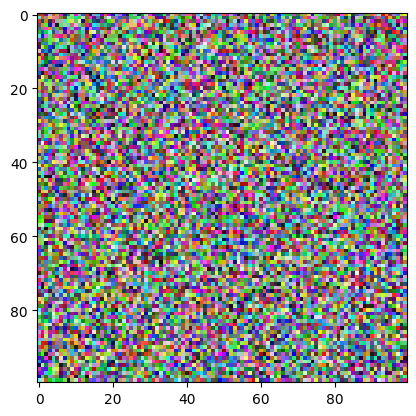

This node split on feature PAY_2, at a value of 1.5


In [6]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

# You visualized and extracted some of the parameters of a random forest model.

**Exploring Random Forest Hyperparameters**   
Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

You will have available:

X_train, X_test, y_train, y_test DataFrames
An existing pre-trained random forest estimator, rf_clf_old
The predictions of the existing random forest estimator on the test set, rf_old_predictions


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_clf_old = RandomForestClassifier(n_estimators=5, random_state=42)

# Fit the model to the training data
rf_clf_old.fit(X_train, y_train)

# Make predictions on the test set using the old model
rf_old_predictions = rf_clf_old.predict(X_test)

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions)))

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

# We got a nice 5% accuracy boost just from changing the n_estimators.
# You have had your first taste of hyperparameter tuning for a random forest model.

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[5314  559]
 [1050  577]] 
 Accuracy Score: 

 0.7854666666666666
Confusion Matrix: 

 [[5530  343]
 [1033  594]]
Accuracy Score: 

 0.8165333333333333


**Hyperparameters of KNN**   
To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

You will have available:

- X_train, X_test, y_train, y_test DataFrames

In [8]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

# You successfully tested 3 different options for 1 hyperparameter, but it was pretty exhausting. Next, we will try to find a way to make this easier.

The accuracy of 5, 10, 20 neighbours was 0.7514666666666666, 0.7770666666666667, 0.7822666666666667


### Setting & Analyzing Hyperparameter Values

**Automating Hyperparameter Choice**   
Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

You will have available X_train, X_test, y_train & y_test datasets, and GradientBoostingClassifier has been imported for you.

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

# You efficiently tested a few different values for a single hyperparameter and can easily see which learning rate value was the best.
# Here, it seems that a learning rate of 0.05 yields the best accuracy.

   learning_rate  accuracy
0          0.001  0.783067
1          0.010  0.815600
2          0.050  0.820400
3          0.100  0.821600
4          0.200  0.818933
5          0.500  0.812800


***Building Learning Curves***  
If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is np.linspace(start, end, num) which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.

You will have available X_train, X_test, y_train & y_test datasets.

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01 , 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

# You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop.
# You have learned and practiced a useful skill for visualizing large amounts of results for a single hyperparameter